In [302]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv('/kaggle/input/fsdfsdf/amazon.csv')

data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [303]:
# Mostrar las primeras filas para entender la estructura del conjunto de datos
print("Primeras filas del conjunto de datos original:")
print(data.head())



Primeras filas del conjunto de datos original:
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2      

In [304]:
# Mostrar información general del DataFrame
print("\nInformación del DataFrame original:")
print(data.info())



Información del DataFrame original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link      

In [305]:
# Función para convertir el precio a float
def convertir_precio(precio):
    precio = precio.replace('₹', '').replace(',', '')
    try:
        return float(precio)
    except ValueError:
        return np.nan

In [306]:
# Aplicar la conversión a la columna 'discounted_price'
data['discounted_price'] = data['discounted_price'].apply(convertir_precio)


In [307]:
# Eliminar filas con valores NaN en la columna 'discounted_price'
data.dropna(subset=['discounted_price'], inplace=True)


In [308]:
# Convertir columnas que se pueden convertir a numéricas
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating_count'] = data['rating_count'].str.replace(',', '').astype(float)


In [309]:
# Convertir columnas categóricas a valores numéricos utilizando LabelEncoder
le = LabelEncoder()
for column in ['product_id', 'product_name', 'category', 'actual_price', 'discount_percentage', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']:
    data[column] = le.fit_transform(data[column].astype(str))


In [310]:
# Mostrar información del DataFrame después de convertir las columnas categóricas
print("\nInformación del DataFrame después de convertir columnas categóricas:")
print(data.info())


Información del DataFrame después de convertir columnas categóricas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   int64  
 1   product_name         1465 non-null   int64  
 2   category             1465 non-null   int64  
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   int64  
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   int64  
 9   user_id              1465 non-null   int64  
 10  user_name            1465 non-null   int64  
 11  review_id            1465 non-null   int64  
 12  review_title         1465 non-null   int64  
 13  review_content       1465 non-null   int64  
 14  img_link          

In [311]:
# Eliminar filas con valores NaN en cualquier columna restante
data.dropna(inplace=True)

In [312]:
# Mostrar información final del DataFrame después de eliminar filas con NaN
print("\nInformación final del DataFrame después de eliminar filas con NaN:")
print(data.info())


Información final del DataFrame después de eliminar filas con NaN:
<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   int64  
 1   product_name         1462 non-null   int64  
 2   category             1462 non-null   int64  
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   int64  
 5   discount_percentage  1462 non-null   int64  
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   int64  
 9   user_id              1462 non-null   int64  
 10  user_name            1462 non-null   int64  
 11  review_id            1462 non-null   int64  
 12  review_title         1462 non-null   int64  
 13  review_content       1462 non-null   int64  
 14  img_link             1462

In [313]:
# Separar las características (features) y la variable objetivo (target)
X = data.drop(columns='discounted_price')
y = data['discounted_price']

In [314]:
# Verificar la cantidad de datos en X y y
print(f"\nCantidad de muestras en X: {X.shape[0]}")
print(f"Cantidad de muestras en y: {y.shape[0]}")


Cantidad de muestras en X: 1462
Cantidad de muestras en y: 1462


In [315]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [316]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [317]:
# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print(f"\nDimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")


Dimensiones de X_train: (1169, 15)
Dimensiones de X_test: (293, 15)
Dimensiones de y_train: (1169,)
Dimensiones de y_test: (293,)


In [318]:
# Entrenar el modelo K-Neighbors Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)


KNeighborsRegressor()

In [319]:
# Predecir los valores para el conjunto de prueba
y_pred = knn_regressor.predict(X_test_scaled)


In [320]:
# Calcular y mostrar el error cuadrático medio y el coeficiente de determinación R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nError cuadrático medio del modelo K-NN: {mse:.2f}")
print(f"Coeficiente de determinación R^2 del modelo K-NN: {r2:.2f}")



Error cuadrático medio del modelo K-NN: 21616891.46
Coeficiente de determinación R^2 del modelo K-NN: 0.26


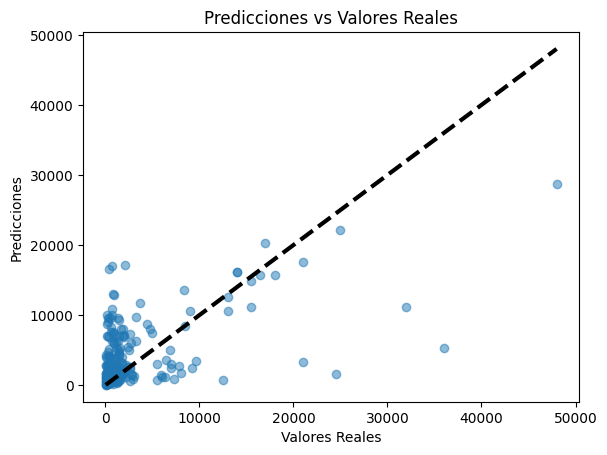

In [321]:
# Mostrar la gráfica de predicciones vs valores reales
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()